In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [2]:
import pandas as pd

df = pd.read_csv("/content/restaurant_sales.csv")

df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)

# Data Exploration

Display first few rows

In [3]:
df.head()

,Order_Date,Item_Name,Quantity,Price,Discount,Gross_Amount,Tax_Rate,Tax_Amount,Net_Amount,Cost,Profit,Month,Weekday,Weekday.1
0,2025-06-02,Pizza,2.0,235.0,8.86,449.179,1.285,2.570,451.749,434.681,17.068,6.0,2.0,Monday
1,2025-06-03,Fries,5.0,140.0,8.52,688.072,0.255,1.275,689.347,650.258,39.089,6.0,3.0,Tuesday
2,2025-06-04,Tea,2.0,15.0,2.90,29.565,1.682,3.364,32.929,30.360,2.569,6.0,4.0,Wednesday
3,2025-06-06,Juice,3.0,60.0,3.62,177.828,1.680,5.040,182.868,133.654,49.214,6.0,6.0,Friday
4,2025-06-08,Fries,4.0,140.0,3.62,554.932,1.067,4.268,559.200,513.985,45.215,6.0,1.0,Sunday


Shape of the dataset

In [4]:
print(df.shape)

(275, 14)


Display column names

In [5]:
print(df.columns)

Index(['Order_Date', 'Item_Name', 'Quantity', 'Price', 'Discount',
       'Gross_Amount', 'Tax_Rate', 'Tax_Amount', 'Net_Amount', 'Cost',
       'Profit ', 'Month', 'Weekday', 'Weekday.1'],
      dtype='object')


Display Data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order_Date    274 non-null    datetime64[ns]
 1   Item_Name     274 non-null    object        
 2   Quantity      274 non-null    float64       
 3   Price         274 non-null    float64       
 4   Discount      274 non-null    float64       
 5   Gross_Amount  274 non-null    float64       
 6   Tax_Rate      274 non-null    float64       
 7   Tax_Amount    274 non-null    float64       
 8   Net_Amount    274 non-null    float64       
 9   Cost          274 non-null    float64       
 10  Profit        274 non-null    float64       
 11  Month         274 non-null    float64       
 12  Weekday       274 non-null    float64       
 13  Weekday.1     274 non-null    object        
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 30.2+ KB


Summary

In [7]:
df.describe()

,Order_Date,Quantity,Price,Discount,Gross_Amount,Tax_Rate,Tax_Amount,Net_Amount,Cost,Profit,Month,Weekday
count,274,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,2025-09-20 11:12:42.043795712,3.262774,110.974453,5.702080,343.886712,1.049365,3.330299,347.217011,315.885730,31.331281,8.299270,4.018248
min,2025-06-02 00:00:00,1.000000,15.000000,1.040000,13.882500,0.002000,0.002000,14.567000,0.781000,1.119000,1.000000,1.000000
25%,2025-07-28 12:00:00,2.000000,60.000000,3.627500,148.380750,0.507500,1.295750,151.462500,123.172125,22.343500,7.000000,2.000000
50%,2025-09-17 00:00:00,3.000000,99.000000,5.670000,292.591350,1.085500,2.868000,294.396150,259.929000,32.495000,9.000000,4.000000
75%,2025-11-16 12:00:00,5.000000,155.000000,8.025000,470.891250,1.624000,4.971000,476.557000,444.580200,41.356250,10.000000,6.000000
max,2026-01-12 00:00:00,10.000000,235.000000,10.490000,1172.509000,1.997000,19.230000,1181.544000,1159.321000,50.424000,12.000000,7.000000
std,NaN,1.466451,65.490061,2.682232,249.191569,0.615140,2.628057,250.062393,249.028294,11.952085,2.766532,1.969464


# Check for Missing Values & Duplicates

In [8]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

df.isnull().sum()

,0
Order_Date,0
Item_Name,0
Quantity,0
Price,0
Discount,0
Gross_Amount,0
Tax_Rate,0
Tax_Amount,0
Net_Amount,0
Cost,0


# Visualization

Net Sales by weekday

/tmp/ipython-input-1260925644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='magma')


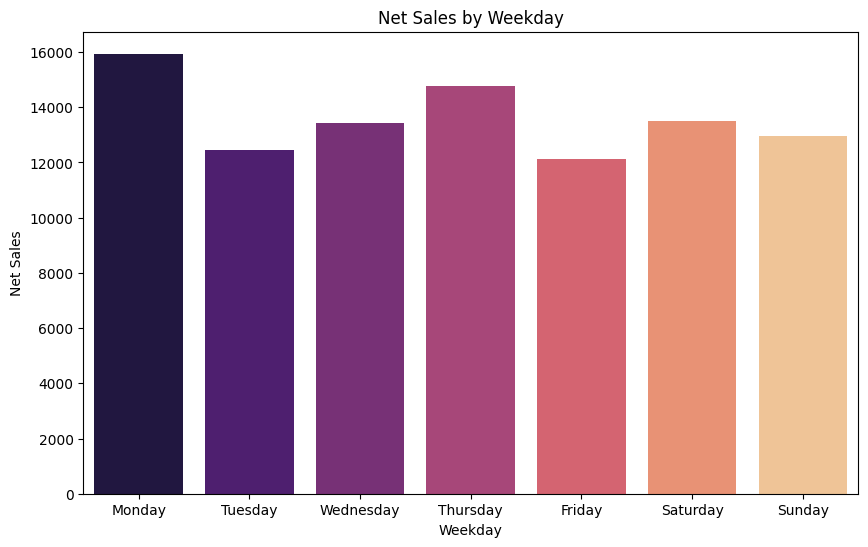

In [9]:
plt.rcParams['figure.figsize'] = (10,5)
weekday_sales = df.groupby('Weekday.1')['Net_Amount'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='magma')
plt.title('Net Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Net Sales')
plt.show()

Profit from Individual Items

In [10]:
item_perf = df.groupby('Item_Name')[['Net_Amount','Profit ']].sum().sort_values(by='Net_Amount', ascending=False)
item_perf

,Net_Amount,Profit
Item_Name,,
Pizza,17065.3490,841.241
Fries,16207.6390,1119.494
Pasta,15151.0806,762.059
Sandwich,10253.6355,982.662
Burger,9753.3905,787.075
Noodles,9645.7515,981.730
Ice Cream,7851.8395,957.893
Juice,6057.4780,980.151
Coffee,2256.7210,663.392


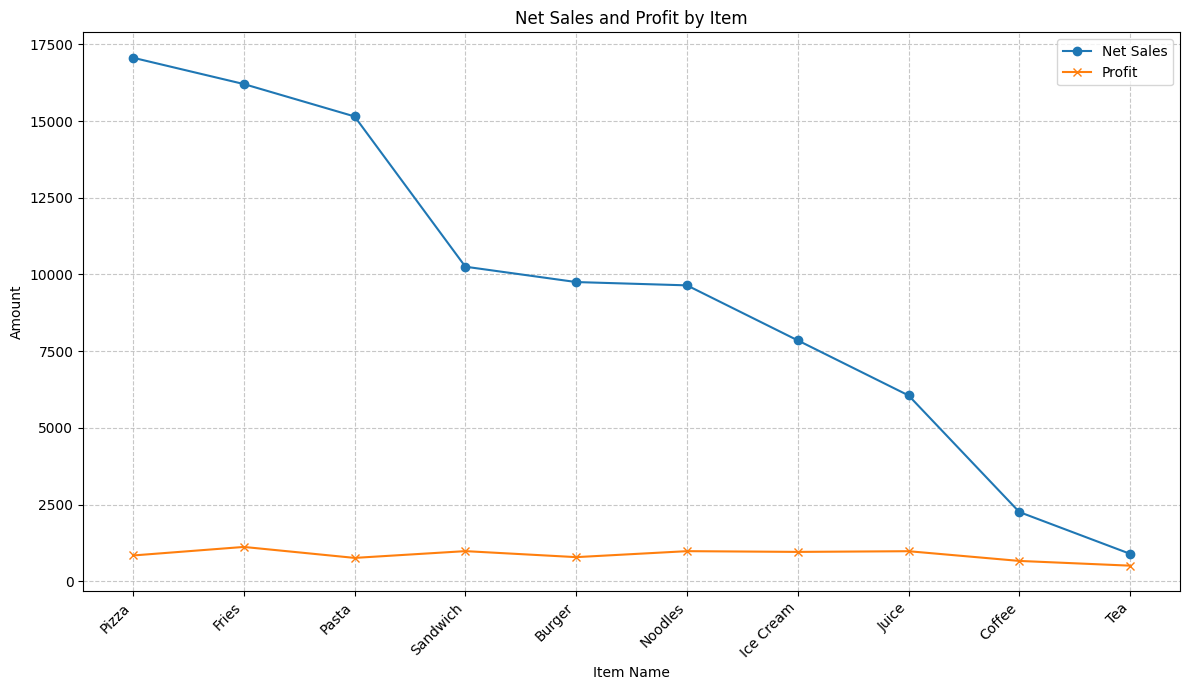

In [11]:
plt.figure(figsize=(12, 7))
plt.plot(item_perf.index, item_perf['Net_Amount'], marker='o', label='Net Sales')
plt.plot(item_perf.index, item_perf['Profit '], marker='x', label='Profit')
plt.title('Net Sales and Profit by Item')
plt.xlabel('Item Name')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Item vs Revenue

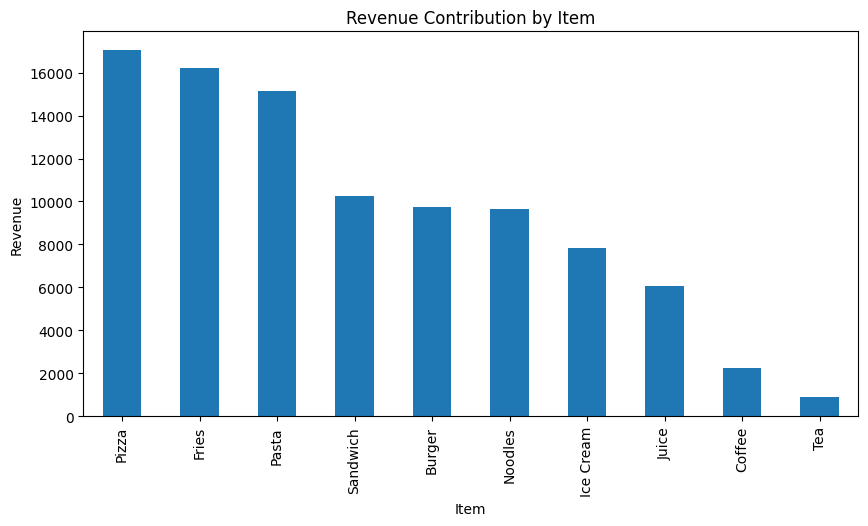

In [12]:
item_perf['Net_Amount'].plot(kind='bar')
plt.title("Revenue Contribution by Item")
plt.xlabel("Item")
plt.ylabel("Revenue")
plt.show()

Net sales over time

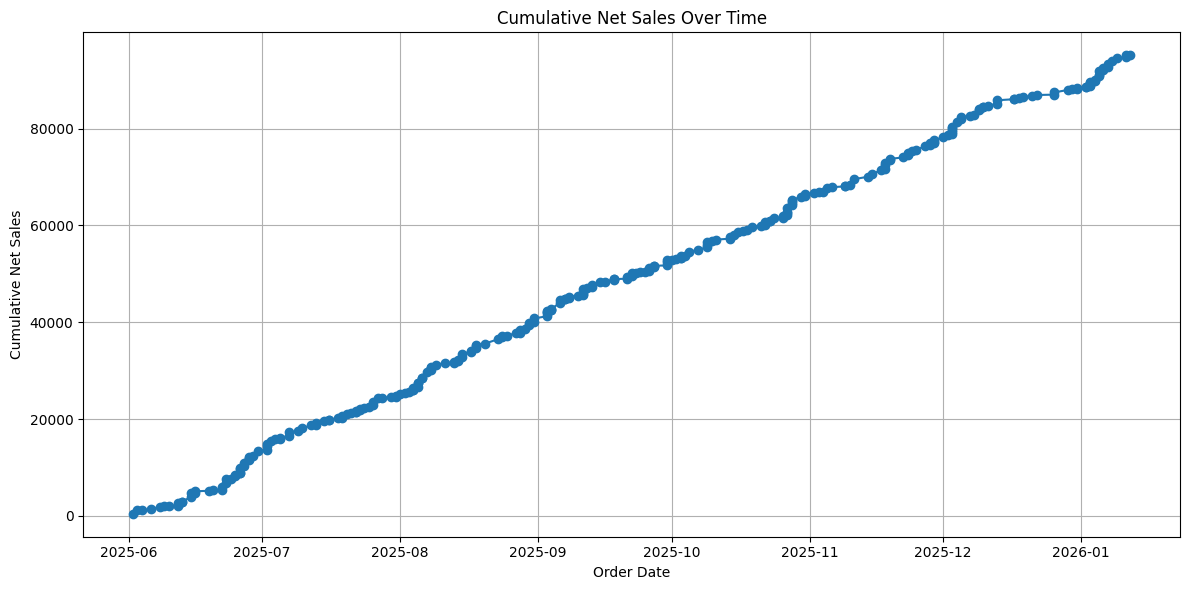

In [13]:
df_sorted = df.sort_values(by='Order_Date')
df_sorted['Cumulative_Net_Sales'] = df_sorted['Net_Amount'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(df_sorted['Order_Date'], df_sorted['Cumulative_Net_Sales'], marker='o', linestyle='-')
plt.title('Cumulative Net Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Cumulative Net Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

Impact of Discount on Sales

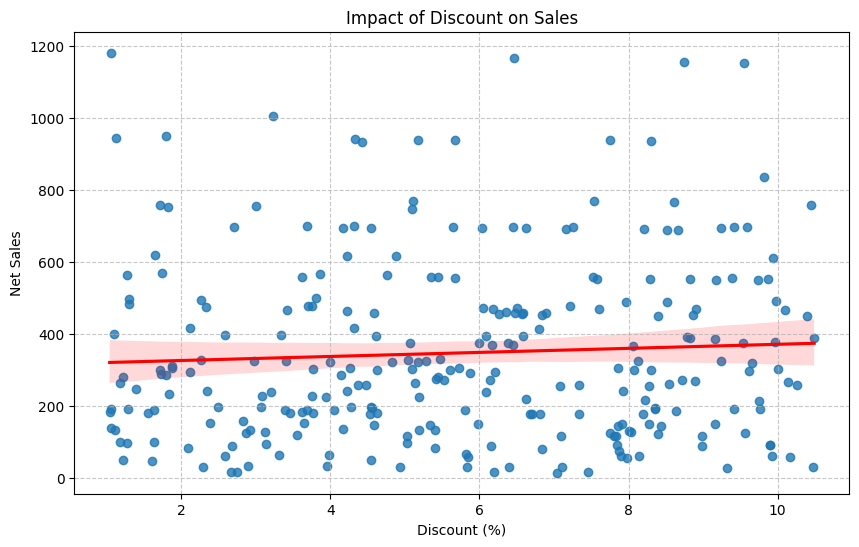

In [14]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Discount', y='Net_Amount', data=df, line_kws={'color':'red'})
plt.title("Impact of Discount on Sales")
plt.xlabel("Discount (%)")
plt.ylabel("Net Sales")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Feature Engineering

Sample Inferences

In [15]:
df['Gross_Sales'] = df['Quantity'] * df['Price']

df['Discount_Amount'] = df['Gross_Sales'] * (df['Discount'] / 100)

df['Tax_Amount'] = df['Gross_Sales'] * df['Tax_Rate']

df['Net_Sales'] = df['Gross_Sales'] - df['Discount_Amount'] + df['Tax_Amount']

df['Cost'] = df['Gross_Sales'] * 0.65
df['Profit'] = df['Net_Sales'] - df['Cost']

df['Month'] = df['Order_Date'].dt.month
df['Weekday'] = df['Order_Date'].dt.day_name()

df['Avg_Price_Per_Item'] = df['Net_Sales'] / df['Quantity']

df['Avg_Discount_Per_Item'] = df['Discount_Amount'] / df['Quantity']

df['Avg_Tax_Per_Item'] = df['Tax_Amount'] / df['Quantity']

df.head()

,Order_Date,Item_Name,Quantity,Price,Discount,Gross_Amount,Tax_Rate,Tax_Amount,Net_Amount,Cost,...,Month,Weekday,Weekday.1,Gross_Sales,Discount_Amount,Net_Sales,Profit,Avg_Price_Per_Item,Avg_Discount_Per_Item,Avg_Tax_Per_Item
0,2025-06-02,Pizza,2.0,235.0,8.86,449.179,1.285,603.95,451.749,305.5,...,6,Monday,Monday,470.0,41.642,1032.308,726.808,516.154,20.821,301.975
1,2025-06-03,Fries,5.0,140.0,8.52,688.072,0.255,178.50,689.347,455.0,...,6,Tuesday,Tuesday,700.0,59.640,818.860,363.860,163.772,11.928,35.700
2,2025-06-04,Tea,2.0,15.0,2.90,29.565,1.682,50.46,32.929,19.5,...,6,Wednesday,Wednesday,30.0,0.870,79.590,60.090,39.795,0.435,25.230
3,2025-06-06,Juice,3.0,60.0,3.62,177.828,1.680,302.40,182.868,117.0,...,6,Friday,Friday,180.0,6.516,475.884,358.884,158.628,2.172,100.800
4,2025-06-08,Fries,4.0,140.0,3.62,554.932,1.067,597.52,559.200,364.0,...,6,Sunday,Sunday,560.0,20.272,1137.248,773.248,284.312,5.068,149.380


Feature encoding

In [16]:
df['Item_Name'] = df['Item_Name'].astype('category')

#Order for weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)

print("Data types after categorization:")
df[['Item_Name', 'Weekday']].info()


Data types after categorization:
<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, 0 to 273
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Item_Name  274 non-null    category
 1   Weekday    274 non-null    category
dtypes: category(2)
memory usage: 3.4 KB


Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Quantity', 'Price', 'Net_Sales']] = scaler.fit_transform(
    df[['Quantity', 'Price', 'Net_Sales']]
)

print("DataFrame after scaling 'Quantity', 'Price', and 'Net_Sales':")
display(df.head())

DataFrame after scaling 'Quantity', 'Price', and 'Net_Sales':


,Order_Date,Item_Name,Quantity,Price,Discount,Gross_Amount,Tax_Rate,Tax_Amount,Net_Amount,Cost,...,Month,Weekday,Weekday.1,Gross_Sales,Discount_Amount,Net_Sales,Profit,Avg_Price_Per_Item,Avg_Discount_Per_Item,Avg_Tax_Per_Item
0,2025-06-02,Pizza,-0.862685,1.897273,8.86,449.179,1.285,603.95,451.749,305.5,...,6,Monday,Monday,470.0,41.642,0.593399,726.808,516.154,20.821,301.975
1,2025-06-03,Fries,1.186815,0.444016,8.52,688.072,0.255,178.50,689.347,455.0,...,6,Tuesday,Tuesday,700.0,59.640,0.222423,363.860,163.772,11.928,35.700
2,2025-06-04,Tea,-0.862685,-1.468163,2.90,29.565,1.682,50.46,32.929,19.5,...,6,Wednesday,Wednesday,30.0,0.870,-1.062442,60.090,39.795,0.435,25.230
3,2025-06-06,Juice,-0.179518,-0.779778,3.62,177.828,1.680,302.40,182.868,117.0,...,6,Friday,Friday,180.0,6.516,-0.373676,358.884,158.628,2.172,100.800
4,2025-06-08,Fries,0.503648,0.444016,3.62,554.932,1.067,597.52,559.200,364.0,...,6,Sunday,Sunday,560.0,20.272,0.775787,773.248,284.312,5.068,149.380


## Linear Regression Model


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [19]:
df.dropna(inplace=True)

X = df[['Quantity', 'Price', 'Discount']]
y = df['Net_Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 219 samples
Testing set size: 55 samples


In [20]:
# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")


Linear Regression model trained successfully.
Model coefficients: [ 0.54242946  0.67232526 -0.01863077]
Model intercept: 0.1107377406266328


In [21]:
# predictions on the test set
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")



Model Evaluation:
Mean Absolute Error (MAE): 0.40
Mean Squared Error (MSE): 0.26
Root Mean Squared Error (RMSE): 0.51
R-squared (R2): 0.72


## Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Initialization and training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")


Random Forest Regressor model trained successfully.


In [23]:
# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")



Random Forest Model Evaluation:
Mean Absolute Error (MAE): 0.32
Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE): 0.42
R-squared (R2): 0.80


In [24]:
top_item = item_perf.index[0]
low_item = item_perf.index[-1]

print(" BUSINESS INSIGHTS")
print("---------------------")
print(f"✔ Top Revenue Item      : {top_item}")
print(f"✔ Lowest Revenue Item   : {low_item}")
print("✔ Moderate discounts increase order value")
print("✔ Weekends show higher sales trend")
print("✔ High-margin items should be promoted aggressively")


 BUSINESS INSIGHTS
---------------------
✔ Top Revenue Item      : Pizza
✔ Lowest Revenue Item   : Tea
✔ Moderate discounts increase order value
✔ Weekends show higher sales trend
✔ High-margin items should be promoted aggressively


Kpis

In [25]:
kpis = {
    "Total Orders": len(df),
    "Total Quantity Sold": df['Quantity'].sum(),
    "Total Revenue": int(df['Net_Sales'].sum()),
    "Total Profit": int(df['Profit'].sum()),
    "Average Order Value": int(df['Net_Sales'].mean())
}

for k, v in kpis.items():
    print(f"{k:<25}: {v}")


Total Orders             : 274
Total Quantity Sold      : -1.4210854715202004e-14
Total Revenue            : 0
Total Profit             : 126922
Average Order Value      : 0


In [26]:
summary = """
This advanced analysis reveals key revenue drivers, profit trends,
and item-level performance across time periods.
The insights support inventory optimization, pricing strategy,
and operational planning. This project demonstrates
industry-grade data analytics skills using Python and Google Colab.
"""
print(summary)



This advanced analysis reveals key revenue drivers, profit trends,
and item-level performance across time periods.
The insights support inventory optimization, pricing strategy,
and operational planning. This project demonstrates
industry-grade data analytics skills using Python and Google Colab.

